/home/chicolucio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


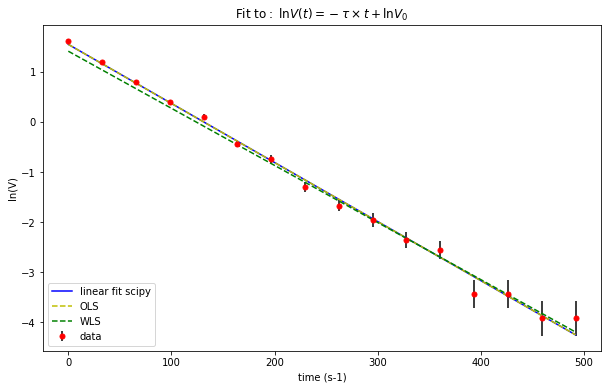

##############################################################################################
                          Linear regression with Scipy Results
Slope: -0.0117950235207
Intercept: 1.54901367842
R: -0.996953950051
R2: 0.993917178521
P: 6.4717503437e-17
Std err slope: 0.000246610878556

###############################################################################################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2288.
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           6.47e-17
Time:                        21:39:59   Log-Likelihood:                 8.8100
No. Observations:                  16   AIC:                            -13.62
Df Residuals:                      14   BIC:        

/home/chicolucio/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import uncertainties as u
from uncertainties import unumpy

# read data from file
time, volt, volt_err = np.loadtxt('RLcircuit.txt', skiprows=2, unpack=True)

#utilizando o package uncertainties para juntar o dado com sua incerteza
volt_u = unumpy.uarray(volt, volt_err)

# Transform data and parameters to linear form: Y = A + B*X
x = time  # transform t data for fitting

y = unumpy.log(volt_u)  # transform data for fitting

#isolando os valores de erros para a ordenada após linearização
y_err = unumpy.std_devs(y)

#fit scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x, unumpy.nominal_values(y))

#fit statsmodel OLS
#time = sm.add_constant(time)
#X = np.column_stack((time,vel))
X = sm.add_constant(x)
fit_ols = sm.OLS(unumpy.nominal_values(y), X).fit()

#fit statsmodel WLS
fit_wls = sm.WLS(unumpy.nominal_values(y), X, weights=y_err).fit()

# create plot
plt.figure(1, figsize=(10, 6))

plt.errorbar(x,
             unumpy.nominal_values(y),
             fmt='ro',
             label="data",
             yerr=y_err,
             markersize=5,
             ecolor='black')

plt.plot(x, intercept + slope * x, 'b-', label="linear fit scipy")

plt.plot(x, fit_ols.fittedvalues, 'y--', label="OLS")

plt.plot(x, fit_wls.fittedvalues, 'g--', label="WLS")

plt.title("$\mathrm{Fit\\ to:}\\ \ln V(t) = -\\tau \\times t + \ln V_0$")

plt.ylabel('ln(V)')
plt.xlabel('time (s-1)')
plt.legend(loc='lower left')

plt.show()

print(
    '##############################################################################################'
)
print('                          Linear regression with Scipy Results')
print('Slope:', slope)
print('Intercept:', intercept)
print('R:', r_value)
print('R2:', r_value**2)
print('P:', p_value)
print('Std err slope:', std_err)

print(
    '\n###############################################################################################'
)
print(fit_ols.summary())
print(
    '\n###############################################################################################'
)
print(fit_wls.summary())

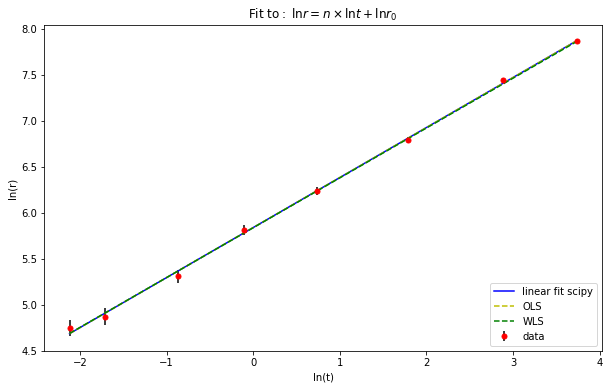

##############################################################################################
                          Linear regression with Scipy Results
Slope: 0.543872084004
Intercept: 5.83677859195
R: 0.999424877025
R2: 0.998850084817
P: 4.75373327648e-10
Std err slope: 0.0075336231381

###############################################################################################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5212.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           4.75e-10
Time:                        21:06:15   Log-Likelihood:                 15.054
No. Observations:                   8   AIC:                            -26.11
Df Residuals:                       6   BIC:            

/home/chicolucio/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import uncertainties as u
from uncertainties import unumpy

# read data from file
time, size, size_err = np.loadtxt('nanoagg.txt', skiprows=4, unpack=True)

#utilizando o package uncertainties para juntar o dado com sua incerteza
size_u = unumpy.uarray(size, size_err)

# Transform data and parameters to linear form: Y = A + B*X
#x = unumpy.log(time)           # transform t data for fitting
x = np.log(time)

y = unumpy.log(size_u)  # transform data for fitting

#isolando os valores de erros para a ordenada após linearização
y_err = unumpy.std_devs(y)

#fit scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x, unumpy.nominal_values(y))

#fit statsmodel OLS
#time = sm.add_constant(time)
#X = np.column_stack((time,vel))
X = sm.add_constant(x)
fit_ols = sm.OLS(unumpy.nominal_values(y), X).fit()

#fit statsmodel WLS
fit_wls = sm.WLS(unumpy.nominal_values(y), X, weights=y_err).fit()

# create plot
plt.figure(1, figsize=(10, 6))

plt.errorbar(x,
             unumpy.nominal_values(y),
             fmt='ro',
             label="data",
             yerr=y_err,
             markersize=5,
             ecolor='black')

plt.plot(x, intercept + slope * x, 'b-', label="linear fit scipy")

plt.plot(x, fit_ols.fittedvalues, 'y--', label="OLS")

plt.plot(x, fit_wls.fittedvalues, 'g--', label="WLS")

plt.title("$\mathrm{Fit\\ to:}\\ \ln r = n \\times \ln t + \ln r_0$")

plt.ylabel('ln(r)')
plt.xlabel('ln(t)')
plt.legend(loc='lower right')

plt.show()

print(
    '##############################################################################################'
)
print('                          Linear regression with Scipy Results')
print('Slope:', slope)
print('Intercept:', intercept)
print('R:', r_value)
print('R2:', r_value**2)
print('P:', p_value)
print('Std err slope:', std_err)

print(
    '\n###############################################################################################'
)
print(fit_ols.summary())
print(
    '\n###############################################################################################'
)
print(fit_wls.summary())

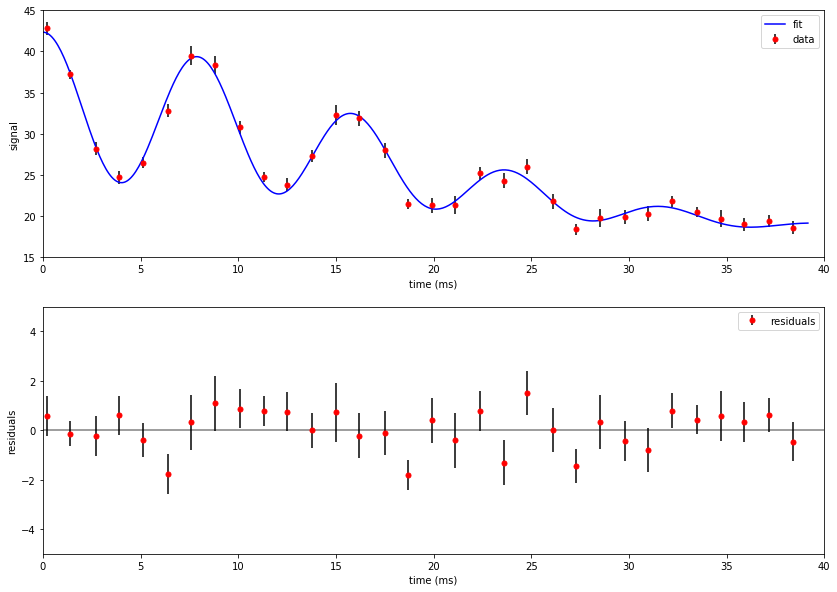

chi-square
1.32855229422

Optimal values for the parameters
[ 15.03064912   0.60123492  18.26380553  15.46636978   0.78417893]

The estimated covariance of optimal values
[[  2.99672678e-01  -1.43874136e-02  -2.29641310e-01   1.91865302e-01
    1.35437348e-05]
 [ -1.43874136e-02   1.36873214e-03   1.27081695e-02  -1.29247404e-02
   -5.47178178e-06]
 [ -2.29641310e-01   1.27081695e-02   2.47261783e-01  -2.63017884e-01
    3.37149570e-05]
 [  1.91865302e-01  -1.29247404e-02  -2.63017884e-01   4.19271992e-01
    2.34570518e-05]
 [  1.35437348e-05  -5.47178178e-06   3.37149570e-05   2.34570518e-05
    1.55856615e-05]]

Summary
[['A' '15.030649116906996' '0.5474236736074373']
 ['B' '0.601234921023763' '0.03699638006448662']
 ['C' '18.263805532396646' '0.49725424430543347']
 ['tau' '15.466369780981534' '0.6475121561223963']
 ['omega' '0.7841789304536748' '0.003947867964529472']]


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import uncertainties as u
from uncertainties import unumpy


# define fitting function
def oscDecay(time, A, B, C, tau, omega):
    fit = A * (1 + B * np.cos(omega * time)) * np.exp(-(time**2) /
                                                      (2 * tau**2)) + C
    return fit


# read data from file
time, signal, signal_err = np.loadtxt('OscData.txt', skiprows=4, unpack=True)

#utilizando o package uncertainties para juntar o dado com sua incerteza
signal_u = unumpy.uarray(signal, signal_err)

# Transform data and parameters to linear form: Y = A + B*X
#x = unumpy.log(time)           # transform t data for fitting
x = time

y = signal_u  # transform data for fitting

#isolando os valores de erros para a ordenada após linearização
y_err = unumpy.std_devs(y)

# initial values for fitting parameters (guesses) ***** peguei os dados do autor.
# Não sei exatamente como chegar nesses valores
A0 = 15.0
B0 = 0.6
C0 = 1.2 * A0
tau0 = 16.0
omega0 = 2.0 * (2.0 * np.pi / tau0)
#omega0 = 2.34

# fit data using SciPy's Levenberg-Marquart method
nlfit, nlpcov = scipy.optimize.curve_fit(oscDecay,
                                         time,
                                         signal,
                                         p0=[A0, B0, C0, tau0, omega0],
                                         sigma=signal_err)

# unpack uncertainties in fitting parameters from diagonal of covariance matrix
dA, dB, dC, dtau, domega = [np.sqrt(nlpcov[j, j]) for j in range(nlfit.size)]

# create fitting function from fitted parameters
A, B, C, tau, omega = nlfit
time_fit = np.linspace(0.0, 1.02 * time[-1], 512)
signal_fit = oscDecay(time_fit, A, B, C, tau, omega)

# creating an easy way to visualize parameters and its uncertainties
par_name = ['A', 'B', 'C', 'tau', 'omega']
par = [A, B, C, tau, omega]
par_u = [dA, dB, dC, dtau, domega]
parameters_summary = np.column_stack((par_name, par, par_u))

# residuals
resids = signal - oscDecay(time, A, B, C, tau, omega)
redchisqr = ((resids / signal_err)**2).sum() / float(signal.size - 5)
# Residual variance = reduced chi square = s_sq = sum[(f(x)-y)^2]/(N-n),
# where N is number of data points and n is the number of fitting parameters.

# create plot
plt.figure(1, figsize=(14, 10))

plt.subplot(2, 1, 1)  #(rows, columns, position)
plt.errorbar(x,
             unumpy.nominal_values(y),
             fmt='ro',
             label="data",
             yerr=y_err,
             markersize=5,
             ecolor='black')

plt.plot(time_fit, signal_fit, 'b-', label="fit")

plt.xlim(0, 40)
plt.ylim(15, 45)

plt.xlabel('time (ms)')
plt.ylabel('signal')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)  #(rows, columns, position)
plt.errorbar(time,
             resids,
             fmt='ro',
             label="residuals",
             yerr=y_err,
             markersize=5,
             ecolor='black')
plt.xlim(0, 40)
plt.ylim(-5, 5)
plt.axhline(color="gray", zorder=-1)
plt.xlabel('time (ms)')
plt.ylabel('residuals')
plt.legend(loc='upper right')

plt.show()

print('chi-square')
print(redchisqr)

print('\nOptimal values for the parameters')
print(nlfit)

print('\nThe estimated covariance of optimal values')
print(nlpcov)

print('\nSummary')  # ver como fazer na forma de report
print(parameters_summary)

#np.savetxt('fit_param.txt', list(zip(par_name, par, par_u)), delimiter=" ", fmt="%s %f %f")

In [91]:
!cat fit_param.txt